# **Equipe: ICOmprendRien**

**Noms:** Yaniv Benichou, Andreis Purim, James Maistret, Yohann Le Couster, Colin Prudhomme, Mehdi Hammas.


# 1. Description de la Problématique

(Description)


In [25]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import itertools as it
import math

#nombre des clients
n = 9

#capacité du vehicule
Q = 20

#list des clients
N = [i for i in range(1,n+1)]

#nombre des villes (ou nombre des vertices)
V=[0]+N

#matrice coûts

C = np.asarray([[0, 217, 690, 581, 749, 894, 1063, 938, 1065, 1000],
 [217, 0, 462, 409, 537, 677, 845, 711, 838, 773],
 [690, 462, 0, 254, 137, 537, 450, 251, 378, 313],   
 [581, 409, 254, 0, 215, 706, 698, 499, 626, 561],
 [749, 537, 137, 215, 0, 646, 559, 359, 487, 421],
 [894, 677, 537, 706, 646, 0, 206, 290, 469, 403],   
 [1063, 845, 450, 698, 559, 206, 0, 203, 382,317],   
 [938, 711, 251, 499, 359, 290, 203, 0, 187, 122],   
 [1065, 838, 378, 626, 487, 469, 382, 187, 0, 66],
 [1000, 773, 313, 561, 421, 403, 317, 122, 66, 0],   
])

#list de demande
q=[2,5,5,5,5,5,5,5,10]

# 2. Algorithme tabou (Description de l’algorithme tabou, Résultats et simulations (avec des courbes))

(Description)

Mieux chemin trouvé:  [0, 1, 2, 4, 3, 0, 7, 8, 9, 0, 5, 6, 0]
Coût trouvé:  5966
Nombre des vehicules:  3


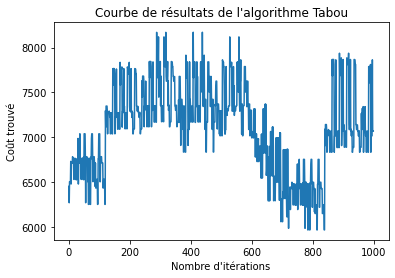

In [26]:
def Tabou():
  def ordre(solu,demande):
    newq=[];
    newq.clear();
    for i in range(len(solu)):
        for j in range(len(demande)):
            if j+1==solu[i]:
                newq.append(demande[j])
    return newq
  #definir les routes
  def routes(solu,dmd):
      soma=0;
      tabu=[];
      R=len(solu)
      i=0
      while i<R:
          soma=soma+dmd[i]
          if soma<=Q:
              tabu.append(solu[i])
              i=i+1
          else:
              tabu.append(0)
              soma=0
      tabu.append(0)
      tabu.insert(0,0)
      return tabu
  #Calcul des couts
  def couts(solu):
      cout=0;
      for i in range(len(solu)):
          if i<len(solu)-1:
              cc=C[solu[i],solu[i+1]]
              cout=cout+cc
      return cout

  coutf=100000000000001 #cout final initial
  ite=0; #compte du nombre d'iterations
  cfinal=[]

  for i in it.permutations(N,n):
      if ite==1000:
          break
      else:
          soli = i          #solution initial
          demandf = ordre(soli,q)
          sol = routes(soli,demandf)
          couti = couts(sol)
          #print("Solution initial : ", sol)
          #print("Demande de chaque arrêt : ", demandf)
          #print("Coût total de cette solution: ", couti)
          #print("\n")
          cfinal.append(couti)
          ite=ite+1;
          if couti<coutf:
              coutf=couti   #cout final
              solf=sol      #solution finale
  aux=solf.count(0)
  aux=aux-1
  print("Mieux chemin trouvé: ", solf)
  print("Coût trouvé: ",coutf)
  print("Nombre des vehicules: ", aux)

  plt.plot(cfinal)
  plt.title("Courbe de résultats de l'algorithme Tabou")
  plt.xlabel("Nombre d'itérations")
  plt.ylabel('Coût trouvé')
  plt.show()
Tabou()

# 3. Recuit simulé (Description de l’algorithme, Résultats et simulations (avec des courbes))

(Description)

In [9]:
def voisinage(s):
    """fonction qui, pour une solution s donnée, renvoie une solution voisinage(s) voisine de s
        voisine veut dire ici qu'il n'y a qu'une permutation entre les deux solutions"""
    n=len(s)
    i=rd.randint(1,n-2)
    j=rd.randint(1,n-2)
    while(i==j):
        j=rd.randint(1,n-2)
    x=s[i]
    s[i]=s[j]
    s[j]=x
    return s

def f(x,w):
    """fonction de coût"""
    s=0
    for i in range(len(x)-1):
        s+=C[x[i]][x[i+1]]
    return w*len(x)+s

def rs(s,w,t0,nb_iter_cycle,a):
    s_et=s
    nb_iter=0
    nv_cycle = True
    t=t0
    while(nv_cycle):
        nb_iter=0
        nv_cycle=False
        while(nb_iter<nb_iter_cycle and t!=0):
            nb_iter+=1
            s1=voisinage(s)
            df=f(s1,w)-f(s,w)
            if(df<0):
                s=s1
                nv_cycle=True
            else:
                prob=math.exp(-df/t)
                q=rd.random()
                if(q<prob):
                    s=s1
                    nv_cycle=True
            if(f(s,w)<f(s_et,w)):
                s_et=s
        t*=a
    return s,f(s,w)

Text(0.5, 1.0, 'Fonction de coût en fonction de $\\omega$')

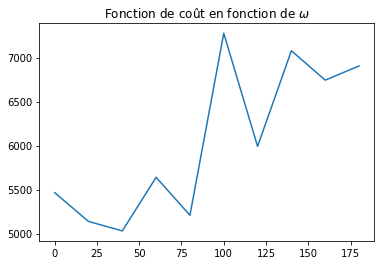

In [10]:
# test sur w
t0=100
nb_iter_cycle=2
a=0.5

x=[]
y=[]
l=[]
for w in range(0,200,20):
    for nb_camions in range(1,3):
        s0=[1, 2, 4, 3, 7, 8, 9, 5, 6]
        for k in range(1,nb_camions):
            s0.append(0)
        rd.shuffle(s0)
        s0 = [0]+s0+[0]
        l.append(rs(s0,w,t0,nb_iter_cycle,a)[1])
    x.append(w)
    y.append(np.min(l))
    l=[]

plt.plot(x,y)
plt.title("Fonction de coût en fonction de $\omega$")

Text(0.5, 1.0, 'Fonction de coût en fonction de $t_0$')

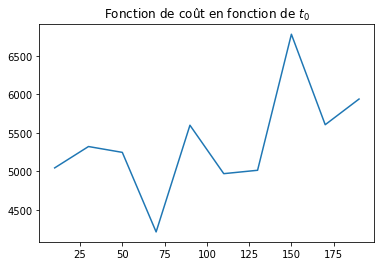

In [12]:
# test sur t0
w=40
nb_iter_cycle=2
a=0.5

x=[]
y=[]
l=[]
for t0 in range(10,200,20):
    for nb_camions in range(1,3):
        s0=[1, 2, 4, 3, 7, 8, 9, 5, 6]
        for k in range(1,nb_camions):
            s0.append(0)
        rd.shuffle(s0)
        s0 = [0]+s0+[0]
        l.append(rs(s0,w,t0,nb_iter_cycle,a)[1])
    x.append(t0)
    y.append(np.min(l))
    l=[]
    
plt.plot(x,y)
plt.title("Fonction de coût en fonction de $t_0$")

Text(0.5, 1.0, "Fonction de coût en fonction du nombre d'itérations par cycle")

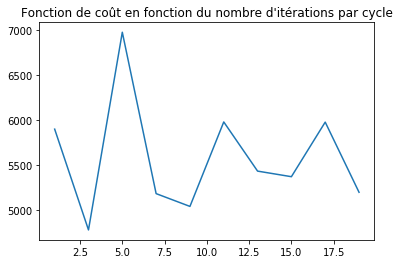

In [13]:
# test sur nb_iter_cycle
w=40
t0=70
a=0.5

x=[]
y=[]
l=[]
for nb_iter_cycle in range(1,20,2):
    for nb_camions in range(1,3):
        s0=[1, 2, 4, 3, 7, 8, 9, 5, 6]
        for k in range(1,nb_camions):
            s0.append(0)
        rd.shuffle(s0)
        s0 = [0]+s0+[0]
        l.append(rs(s0,w,t0,nb_iter_cycle,a)[1])
    x.append(nb_iter_cycle)
    y.append(np.min(l))
    l=[]

plt.plot(x,y)
plt.title("Fonction de coût en fonction du nombre d'itérations par cycle")

Text(0.5, 1.0, 'Fonction de coût en fonction de a')

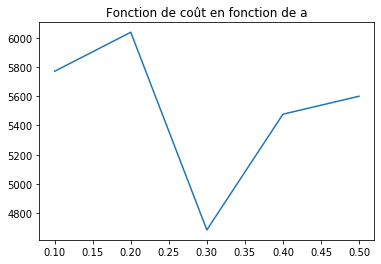

In [14]:
# test sur a
w=40
t0=70
nb_iter_cycle=3

x=[]
y=[]
l=[]
for a in np.arange(0.1,0.51,0.1):
    for nb_camions in range(1,3):
        s0=[1, 2, 4, 3, 7, 8, 9, 5, 6]
        for k in range(1,nb_camions):
            s0.append(0)
        rd.shuffle(s0)
        s0 = [0]+s0+[0]
        l.append(rs(s0,w,t0,nb_iter_cycle,a)[1])
    x.append(a)
    y.append(np.min(l))
    l=[]

plt.plot(x,y)
plt.title("Fonction de coût en fonction de a")

In [ ]:
# test sur tous les paramètres
l=[]
for w in range(0,200,20):
    for t0 in range(10,200,20):
        for nb_iter_cycle in range(1,13,3):
            for a in np.arange(0.1,0.51,0.2):
                for nb_camions in range(1,3):
                    s0=[1, 2, 4, 3, 7, 8, 9, 5, 6]
                    for k in range(1,nb_camions):
                        s0.append(0)
                    rd.shuffle(s0)
                    s0 = [0]+s0+[0]
                    print(w,t0,nb_iter_cycle,a,nb_camions)
                    l.append(rs(s0,w,t0,nb_iter_cycle,a)+(w,t0,nb_iter_cycle,a,nb_camions))
#l contient la solution, le coût et les paramètres

In [ ]:
def fusion(t1,t2):
    if t1==[]:
        return t2
    elif t2==[]:
        return t1
    else:
        if t1[0][1]<t2[0][1]:
            return [t1[0]] + fusion(t1[1:],t2)
        else:
            return [t2[0]] + fusion(t1,t2[1:])

def tri_fusion(T):
    if len(T)<=1:
        return T
    else:
        c = len(T)//2
    return fusion(tri_fusion(T[0:c]),tri_fusion(T[c:]))

#on trie la liste par coût croissant
tri_fusion(l)

10 meilleurs résultats sur un test : <br/>
(solution s, f(s), $\omega$, $t_0$, nombre d'itérations par cycle, $a$, nombre de camions dans la solution)<br/>
([0, 5, 6, 7, 8, 9, 4, 2, 3, 1, 0], 2994, 0, 10, 1, 0.09, 1) <br/>
 ([0, 1, 3, 8, 7, 9, 5, 6, 4, 2, 0], 3556, 0, 190, 7, 0.09, 1)<br/>
 ([0, 1, 3, 7, 6, 5, 2, 8, 9, 4, 0, 0], 3685, 0, 50, 7, 0.4900000000000001, 2)<br/>
 ([0, 1, 4, 5, 6, 9, 8, 2, 7, 3, 0], 3698, 0, 30, 1, 0.09, 1)<br/>
 ([0, 1, 6, 8, 9, 5, 7, 4, 3, 2, 0], 3941, 20, 90, 1, 0.29000000000000004, 1)<br/>
 ([0, 0, 1, 5, 7, 4, 2, 6, 9, 8, 3, 0],  3960,  20,  110,  1,  0.29000000000000004,  2)<br/>
 ([0, 1, 3, 6, 5, 7, 2, 4, 8, 9, 0], 3981, 20, 30, 7, 0.4900000000000001, 1)<br/>
 ([0, 7, 5, 6, 8, 9, 2, 1, 3, 4, 0, 0],  4030,  0,  50,  10,  0.4900000000000001,  2)<br/>
 ([0, 1, 5, 6, 8, 9, 7, 4, 3, 2, 0], 4068, 80, 170, 10, 0.09, 1)<br/>
 ([0, 5, 6, 7, 2, 4, 9, 8, 3, 1, 0], 4090, 60, 70, 7, 0.09, 1)<br/>


# 4. Algorithme génétique(Description de l’algorithme, Résultats et simulations (avec des courbes))

(Descripton)

[2, 8, 5, 7, 4, 1, 3, 9, 6]


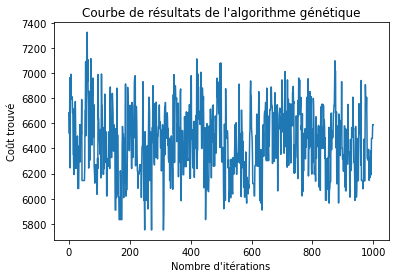

([0, 3, 6, 8, 2, 0, 7, 9, 5, 0, 1, 4, 0], 6589)


In [31]:
def Genetique():
  #taille de la population (doit être paire)
  taillePop = 24

  #génération de solutions cohérentes selon les règles de demande etc
  def routes(solu, demande, capacite):
      somme = 0
      soluf = []
      i = 0
      for i in solu :
          somme += demande[i-1]
          if somme <= capacite:
              soluf.append(i)
          else:
              soluf.append(0)
              soluf.append(i)
              somme = demande[i-1]
      if soluf[-1] != 0 :
          soluf.append(0)
      soluf.insert(0,0)
      return(soluf)
  #génération des permutations permettant de créer la population lorsqu'on leur applique la fonction routes
  def generateur(clients, nbClients, taille) :
      prePopulation = []
      count = 0
      for i in range(taille) :
          prePopulation.append(rd.sample(clients,nbClients))
      return(prePopulation)

  #print(generateur(N,n,taillePop))
  #Opérateurs sur les solutions

  #Les croisements endommagent l'intégrité de la solution, on est obligé de passer par des opérations de vérification...
  def verifSolu(solu, Clients) :
      Absents = []
      Doublons = []
      soluf = solu.copy()
      for i in Clients :
          instances = 0
          for j in range(len(solu)):
              if solu[j] == i and instances == 0 :
                  instances += 1
              elif solu[j] == i and instances == 1 :
                  Doublons.append([i,j])
          if instances == 0 :
              Absents.append(i)
      for k in range(len(Doublons)) :
          soluf[Doublons[k][1]] = Absents[k]
      if len(Absents) > len(Doublons) :
          for l in range(len(Doublons), len(Absents)) :
              soluf.append(Absents[l])
      return(soluf)

  print(verifSolu([2, 8, 8, 7, 4, 1, 3, 9], N))

  #on suppose ici que le critère pertinent est le coût
  def calculCout(solu) :
      cout = 0;
      for i in range(len(solu)) :
          if i < len(solu)-1 :
              cc = C[solu[i], solu[i+1]]
              cout = cout + cc
      return(cout)

  #fonction calculant la valeur du critère (fitness) pour l'ensemble des solutions
  def coutsPopulation(prePopulation, demande, capacite) :
      listeCouts = []
      for i in prePopulation :
          listeCouts.append(calculCout(routes(i, demande, capacite)))
      return(listeCouts)
      
  #print(coutsPopulation(generateur(N,n,taillePop),q,Q))

  #Opération de croisement à un point
  def croisement(solu1, solu2, Clients) :
      s = len(solu1)
      soluc1 = solu1.copy()
      soluc2 = solu2.copy()
      point = rd.randint(0, s-1)
      for i in range(point, s) :
          soluc1[i], soluc2[i] = soluc2[i], soluc1[i]
      soluc1 = verifSolu(soluc1, Clients)
      soluc2 = verifSolu(soluc2, Clients)
      return(soluc1, soluc2)

  #print(croisement(generateur(N,n,taillePop)[1],generateur(N,n,taillePop)[3]))

  #Opération de mutation
  def mutations(solu, Clients):
      a = np.random.randint(0,len(solu))
      b = np.random.randint(0,len(solu))
      while a == b :
          a = np.random.randint(0,len(solu))
          b = np.random.randint(0,len(solu))
      y = solu[b]
      solu[b] = solu[a]
      solu[a] = y
      return(solu)

  #Organisation des solutions selon leur fitness
  def triInsertion(listeCouts, prePopulation):
      k = len(listeCouts)
      for i in range(1, k) :
          cle = listeCouts[i]
          cle2 = prePopulation[i]
          j = i-1
          while j >= 0 and listeCouts[j] > cle:
              listeCouts[j+1] = listeCouts[j]# decalage
              prePopulation[j+1] = prePopulation[j]
              j = j-1
          listeCouts[j+1] = cle
          prePopulation[j+1] = cle2
      return(listeCouts, prePopulation)

  #Assignation d'une probabilité à chaque solution
  def proba(listeCoutsTriee, prePopulationTriee):
      k = len(listeCoutsTriee)
      L = []    
      for i in range(0,k):
          a = int((listeCoutsTriee[k-1]/listeCoutsTriee[i])*10)
          #print(a)
          for j in range(0,a):
              L.append(prePopulationTriee[i])  
      return(L)

  #Construction de S(t)
  def constructS(listeProba, taille):
      k = len(listeProba)
      S = []
      for i in range(0, taille):
          S.append(listeProba[np.random.randint(0, k-1)]) 
      return(S)
  #Amélioration de la solution
  def algoGen(clients, nbClients, demande, capacite, Pcross, Pmut, taille, ite) :
      prePop = generateur(clients, nbClients, taille)
      solf = []
      coutf = 0
      listeCouts = []
      t = 0
      while t <= ite :
          forceTriee, prePopTriee = triInsertion(coutsPopulation(prePop, demande, capacite), prePop)
          solf = routes(prePopTriee[0], demande, capacite)
          coutf = coutsPopulation(prePopTriee, demande, capacite)[0]
          listeCouts.append(coutf)
          
          #construction de S(t)
          listeProba = proba(forceTriee, prePopTriee)
          #print(listeProba)
          S1 = constructS(listeProba, taille)
          
          #construction de S(t+1)
          S2 = []
          for i in range(0,len(S1),2) :
              if rd.random() < Pcross :
                  a,b = croisement(S1[i], S1[i+1], clients)
                  S2.append(a)
                  S2.append(b)
              else :
                  S2.append(S1[i])
                  S2.append(S1[i+1])
          
          #construction de P(t+1)
          prePop = []
          for i in S2 :
              if rd.random() < Pmut :
                  prePop.append(mutations(i,clients))
              else :
                  prePop.append(i)
          t += 1
          #print(prePopTriee,forceTriee)
      plt.plot(listeCouts)
      plt.title("Courbe de résultats de l'algorithme génétique")
      plt.xlabel("Nombre d'itérations")
      plt.ylabel('Coût trouvé')
      plt.show()
      return(solf,coutf)

  print(algoGen(N,n,q,Q,0.4,0.4,taillePop,1000))
Genetique()

# 5. Comparaisons intra et inter groupes

(Comparaisons)